In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import klib

In [2]:
# Load the data
df = pd.read_csv('Train.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Data Preprocessing

In [3]:
df.shape

(8523, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [6]:
# numerical columns

num_cols = [col for col in df.columns if df[col].dtype == 'int64' or df[col].dtype == 'float64']
df[num_cols].head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,3735.1380
1,5.92,0.019278,48.2692,2009,443.4228
2,17.50,0.016760,141.6180,1999,2097.2700
3,19.20,0.000000,182.0950,1998,732.3800
4,8.93,0.000000,53.8614,1987,994.7052


In [7]:
#categorical colmuns

cat_cols = [col for col in df.columns if df[col].dtype == 'object']
df[cat_cols].head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1


In [8]:
# null value in each feature
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
df.Item_Weight.unique()[:8], df.Outlet_Size.unique()

(array([ 9.3  ,  5.92 , 17.5  , 19.2  ,  8.93 , 10.395, 13.65 ,    nan]),
 array(['Medium', nan, 'High', 'Small'], dtype=object))

In [10]:
print(df.Item_Fat_Content.nunique())
df.Item_Fat_Content.unique()

5


array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [11]:
# Replacing duplicate classes in 'Item_Fat' column
df.Item_Fat_Content.replace({'low fat':'Low Fat', 'LF':'Low Fat', 'reg':'Regular'}, inplace = True)
df.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [12]:
# Adding a new column 'Outlet_Age' and drop 'Outlet_Establishment_Year' 

df['Outlet_Age'] = 2021 - df['Outlet_Establishment_Year'] 
df.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,22
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,12


In [13]:
# add new attribute'Item_Category'

df['Item_Category'] = df['Item_Identifier']

for i, val in enumerate(df['Item_Category']):
    df['Item_Category'][i] = val[0:2]  

df['Item_Category'].value_counts()

<ipython-input-13-0dc40daf9a16>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Item_Category'][i] = val[0:2]


FD    6125
NC    1599
DR     799
Name: Item_Category, dtype: int64

In [14]:
# Dealing with nan values in 'Outlet_Size' and 'Item_Weight' columns 

GridSpec(6, 6)

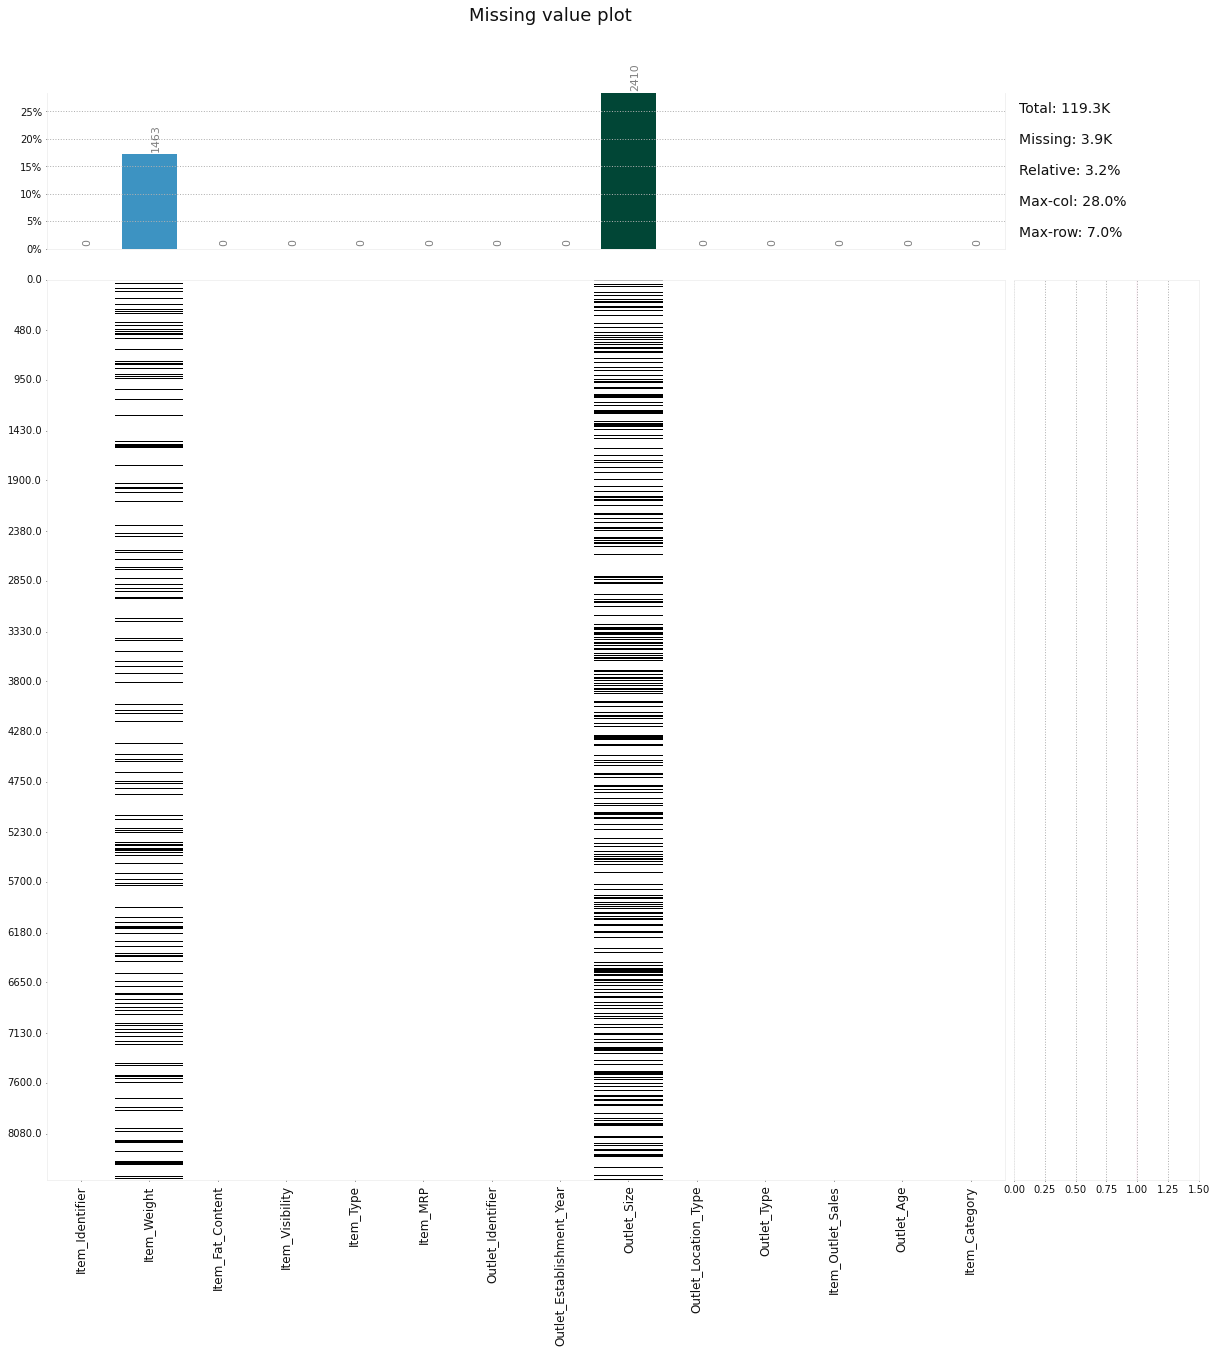

In [15]:
klib.missingval_plot(df) 

In [16]:
pd.crosstab(index = df['Outlet_Size'], columns = df['Outlet_Type'])

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,,,,
High,0,932,0,0
Medium,0,930,928,935
Small,528,1860,0,0


In [17]:
for i, val in enumerate(df['Outlet_Size']):
    
    if(df['Outlet_Type'][i] == 'Grocery Store' and df['Outlet_Size'].isnull()[i] == True):
        df['Outlet_Size'][i] = 'Small'
    
    elif(df['Outlet_Type'][i] == 'Supermarket Type1' and df['Outlet_Size'].isnull()[i] == True):
        df['Outlet_Size'][i] = 'Small'  
    
    elif(df['Outlet_Type'][i] == 'Supermarket Type2' and df['Outlet_Size'].isnull()[i] == True):
        df['Outlet_Size'][i] = 'Medium'
    
    elif(df['Outlet_Type'][i] == 'Supermarket Type3' and df['Outlet_Size'].isnull()[i] == True):
        df['Outlet_Size'][i] = 'Medium'

<ipython-input-17-5179b8be90ae>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Outlet_Size'][i] = 'Small'
<ipython-input-17-5179b8be90ae>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Outlet_Size'][i] = 'Small'


In [18]:
df['Outlet_Size'].value_counts()

Small     4798
Medium    2793
High       932
Name: Outlet_Size, dtype: int64

In [19]:
df['Outlet_Size'].isnull().sum()

0

In [20]:
df.pivot_table(values = "Item_Weight", index = 'Item_Category')

,Item_Weight
Item_Category,
DR,12.072348
FD,12.832186
NC,13.354532


In [21]:
df["Item_Weight"].fillna(df["Item_Weight"].mean(), inplace = True)

In [22]:
df.isnull().sum().sum()

0

In [23]:
df.tail(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age,Item_Category
8520,NCJ29,10.60,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,17,NC
8521,FDN46,7.21,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,12,FD
8522,DRG01,14.80,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700,24,DR


In [24]:
# Check other features

In [25]:
df['Item_Type'].value_counts() 

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [26]:
df['Item_Visibility'].value_counts()

0.000000    526
0.076975      3
0.072238      2
0.080766      2
0.058543      2
           ... 
0.024343      1
0.041823      1
0.023154      1
0.047783      1
0.031007      1
Name: Item_Visibility, Length: 7880, dtype: int64

In [27]:
# Replace the 'Item_Visibility' for items whose Item_Visibility is 0 

df['Item_Visibility'].replace(0, df['Item_Visibility'].mean(), inplace = True)

In [28]:
df['Item_Visibility'].value_counts()

0.066132    526
0.076975      3
0.107037      2
0.159165      2
0.112859      2
           ... 
0.087380      1
0.024343      1
0.041823      1
0.023154      1
0.031007      1
Name: Item_Visibility, Length: 7880, dtype: int64

In [29]:
df['Item_MRP'].min(), df['Item_MRP'].max() 

(31.29, 266.8884)

In [30]:
df['Outlet_Identifier'].unique() 

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [31]:
df['Item_Outlet_Sales'].min(), df['Item_Outlet_Sales'].max()

(33.29, 13086.9648)

In [32]:
df['Item_Type'].replace(['Fruits and Vegetables','Snack Foods','Household','Frozen Foods','Dairy','Canned','Baking Goods','Health and Hygiene','Soft Drinks','Meat','Breads','Hard Drinks','Starchy Foods','Breakfast','Seafood','Others'],['edible','edible','non-edible','edible','edible','edible','edible','non-edible','edible','edible','edible','edible','edible','edible','edible','non-edible'],inplace = True)
df['Item_Type'].value_counts()

edible        6924
non-edible    1599
Name: Item_Type, dtype: int64

In [33]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age,Item_Category
0,FDA15,9.30,Low Fat,0.016047,edible,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,22,FD
1,DRC01,5.92,Regular,0.019278,edible,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,12,DR
2,FDN15,17.50,Low Fat,0.016760,edible,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,22,FD
3,FDX07,19.20,Regular,0.066132,edible,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,23,FD
4,NCD19,8.93,Low Fat,0.066132,non-edible,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,34,NC


# Data Analysis

<AxesSubplot:ylabel='Item_Outlet_Sales'>

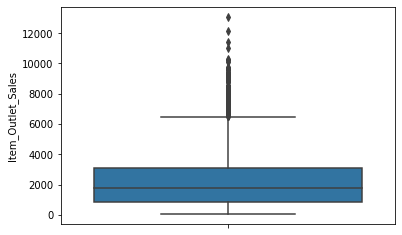

In [34]:
sns.boxplot(y = df['Item_Outlet_Sales'])

<AxesSubplot:ylabel='Item_Weight'>

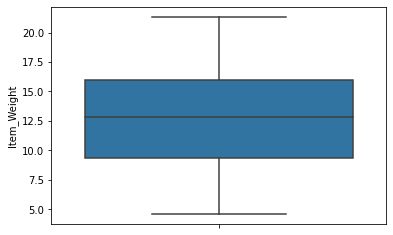

In [35]:
sns.boxplot(y = df['Item_Weight'])

<AxesSubplot:xlabel='Item_Category', ylabel='Item_Outlet_Sales'>

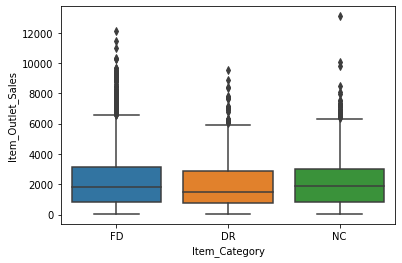

In [36]:
sns.boxplot(x = df["Item_Category"], y = df['Item_Outlet_Sales'])

<AxesSubplot:xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>

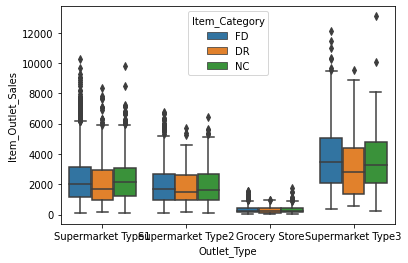

In [37]:
sns.boxplot(x = df['Outlet_Type'], y = df['Item_Outlet_Sales'], hue = df["Item_Category"])

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

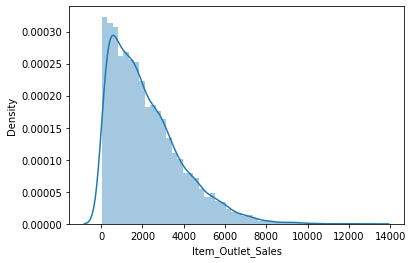

In [38]:
sns.distplot(df['Item_Outlet_Sales'])

<AxesSubplot:xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

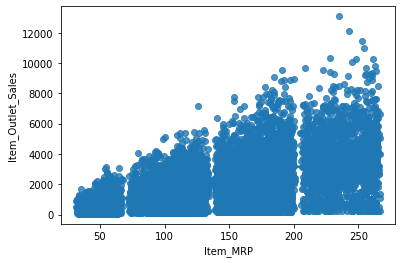

In [39]:
sns.regplot(x='Item_MRP',y='Item_Outlet_Sales',data = df)

<AxesSubplot:xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

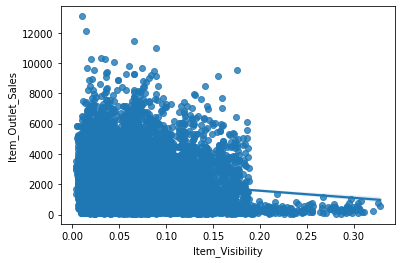

In [40]:
sns.regplot(x ='Item_Visibility',y ='Item_Outlet_Sales',data = df)

In [41]:
# square root transformation or log transformation

#df['Item_Outlet_Sales'] = np.sqrt(df['Item_Outlet_Sales']) 
#df['Item_Outlet_Sales'] = np.log(1 + df['Item_Outlet_Sales']) 

# Here we didnot do any transformation on the target variable because we are getting better results without transformation.

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

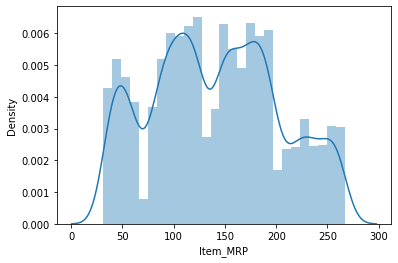

In [42]:
sns.distplot(df['Item_MRP'])

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

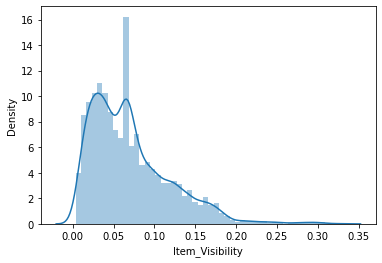

In [43]:
sns.distplot(df['Item_Visibility'])

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

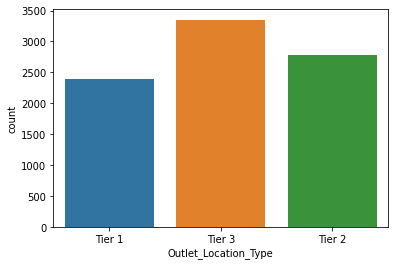

In [44]:
sns.countplot(df['Outlet_Location_Type'])

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

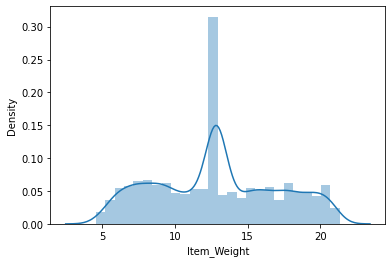

In [45]:
sns.distplot(df['Item_Weight'])

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


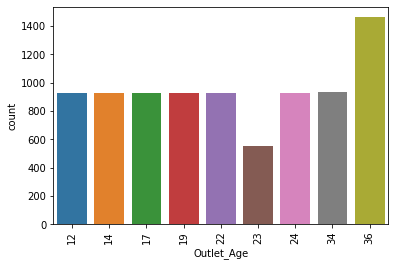

In [46]:
sns.countplot(df['Outlet_Age'])
plt.xticks(rotation = 90)
plt.show()

<AxesSubplot:>

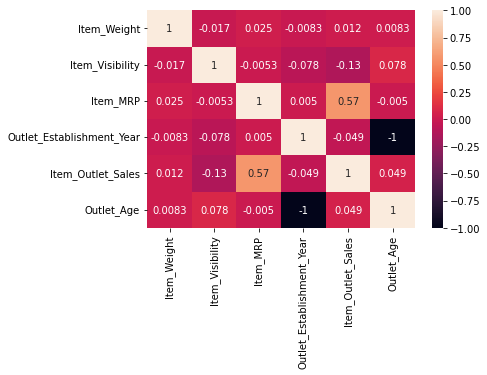

In [47]:
corr = df.corr()
sns.heatmap(corr, annot=True)

In [48]:
# plots using klib

<AxesSubplot:xlabel='Outlet_Age', ylabel='Density'>

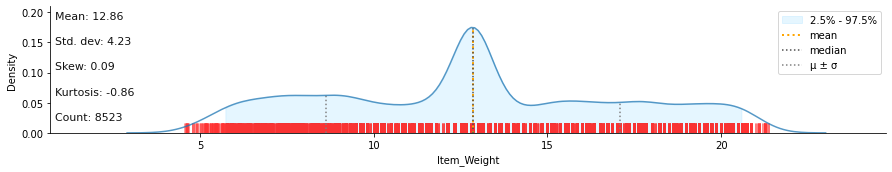

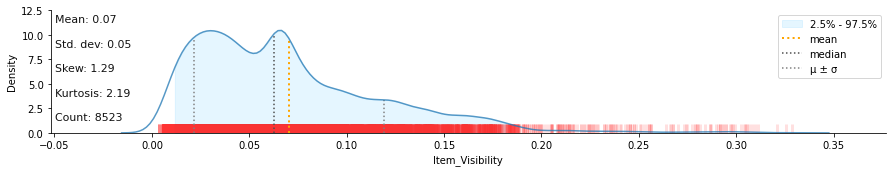

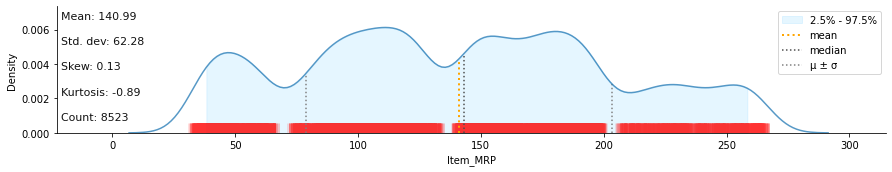

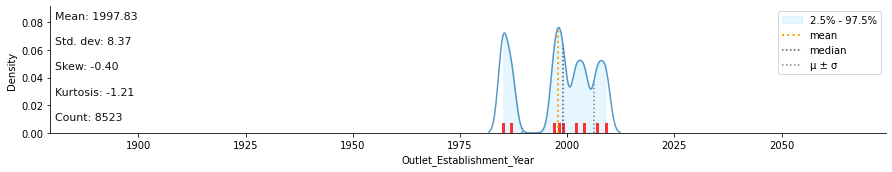

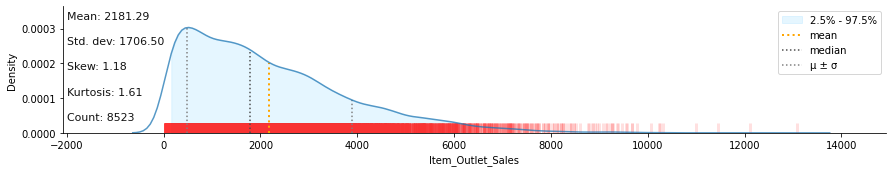

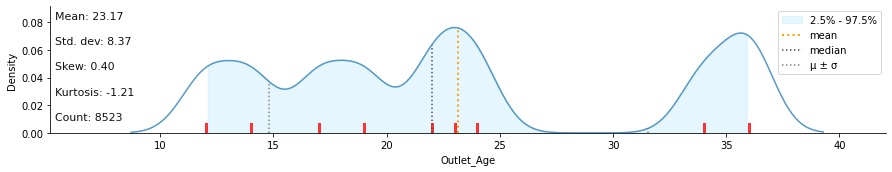

In [49]:
klib.dist_plot(df) 

In [50]:
klib.corr_mat(df)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Age
Item_Weight,1.00,-0.02,0.02,-0.01,0.01,0.01
Item_Visibility,-0.02,1.00,-0.01,-0.08,-0.13,0.08
Item_MRP,0.02,-0.01,1.00,0.01,0.57,-0.01
Outlet_Establishment_Year,-0.01,-0.08,0.01,1.00,-0.05,-1.00
Item_Outlet_Sales,0.01,-0.13,0.57,-0.05,1.00,0.05
Outlet_Age,0.01,0.08,-0.01,-1.00,0.05,1.00


<AxesSubplot:title={'center':'Feature-correlation (pearson)'}>

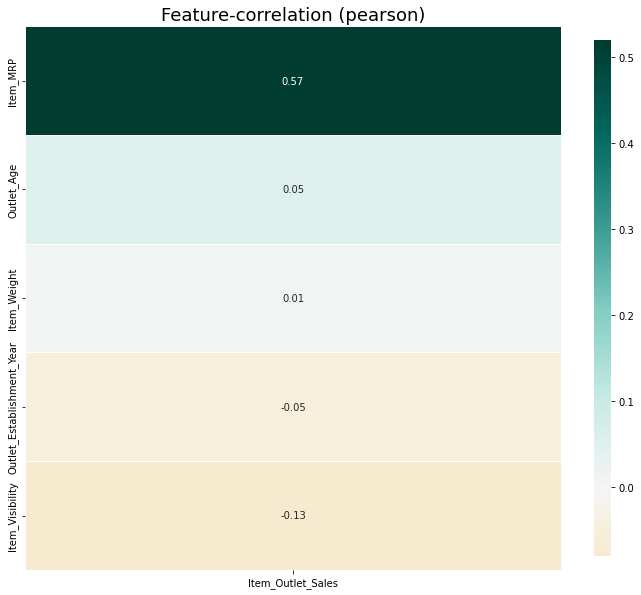

In [51]:
klib.corr_plot(df, target='Item_Outlet_Sales')

# Encoding 

In [52]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['Item_Fat_Content'] = le.fit_transform(df['Item_Fat_Content'])
df['Item_Type'] = le.fit_transform(df['Item_Type'])
df['Outlet_Size'] = le.fit_transform(df['Outlet_Size'])
df['Outlet_Location_Type'] = le.fit_transform(df['Outlet_Location_Type'])
df['Outlet_Type'] = le.fit_transform(df['Outlet_Type'])

In [53]:
# Onehot Encoding

#df = pd.get_dummies(df, columns = ['Item_Fat_Content', 'Item_Type','Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'])

In [54]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age,Item_Category
0,FDA15,9.30,0,0.016047,0,249.8092,OUT049,1999,1,0,1,3735.1380,22,FD
1,DRC01,5.92,1,0.019278,0,48.2692,OUT018,2009,1,2,2,443.4228,12,DR
2,FDN15,17.50,0,0.016760,0,141.6180,OUT049,1999,1,0,1,2097.2700,22,FD
3,FDX07,19.20,1,0.066132,0,182.0950,OUT010,1998,2,2,0,732.3800,23,FD
4,NCD19,8.93,0,0.066132,1,53.8614,OUT013,1987,0,2,1,994.7052,34,NC


# Quick Pre-Processing and EDA on Test Data

In [55]:
# import test data and preprocess

df_test = pd.read_csv('Test.csv')
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [56]:
df_test.shape

(5681, 11)

In [57]:
 df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [58]:
print(df_test.Item_Fat_Content.nunique())
df_test.Item_Fat_Content.unique()

5


array(['Low Fat', 'reg', 'Regular', 'LF', 'low fat'], dtype=object)

In [59]:
# Replacing duplicate classes in 'Item_Fat' column
df_test.Item_Fat_Content.replace({'low fat':'Low Fat', 'LF':'Low Fat', 'reg':'Regular'}, inplace = True)
df_test.Item_Fat_Content.value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

In [60]:
# Adding a new column 'Outlet_Age' and drop 'Outlet_Establishment_Year' 

df_test['Outlet_Age'] = 2021 - df_test['Outlet_Establishment_Year'] 
df_test.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Age
0,FDW58,20.75,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,22
1,FDW14,8.30,Regular,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,14


In [61]:
# add new attribute'Item_Category'

df_test['Item_Category'] = df_test['Item_Identifier']

for i, val in enumerate(df_test['Item_Category']):
    df_test['Item_Category'][i] = val[0:2]  

df_test['Item_Category'].value_counts()

<ipython-input-61-7f1fd5318304>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Item_Category'][i] = val[0:2]


FD    4076
NC    1087
DR     518
Name: Item_Category, dtype: int64

In [62]:
# filling nan values

In [63]:
pd.crosstab(index = df_test['Outlet_Size'], columns = df_test['Outlet_Type'])

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,,,,
High,0,621,0,0
Medium,0,620,618,624
Small,352,1240,0,0


In [64]:
for i, val in enumerate(df_test['Outlet_Size']):
    
    if(df_test['Outlet_Type'][i] == 'Grocery Store' and df_test['Outlet_Size'].isnull()[i] == True):
        df_test['Outlet_Size'][i] = 'Small'
    
    elif(df_test['Outlet_Type'][i] == 'Supermarket Type1' and df_test['Outlet_Size'].isnull()[i] == True):
        df_test['Outlet_Size'][i] = 'Small'  
    
    elif(df_test['Outlet_Type'][i] == 'Supermarket Type2' and df_test['Outlet_Size'].isnull()[i] == True):
        df_test['Outlet_Size'][i] = 'Medium'
    
    elif(df_test['Outlet_Type'][i] == 'Supermarket Type3' and df_test['Outlet_Size'].isnull()[i] == True):
        df_test['Outlet_Size'][i] = 'Medium'

<ipython-input-64-232470ed4f36>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Outlet_Size'][i] = 'Small'
<ipython-input-64-232470ed4f36>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Outlet_Size'][i] = 'Small'


In [65]:
df_test['Outlet_Size'].value_counts()

Small     3198
Medium    1862
High       621
Name: Outlet_Size, dtype: int64

In [66]:
df_test.pivot_table(values = "Item_Weight", index = 'Item_Category')

,Item_Weight
Item_Category,
DR,12.187500
FD,12.591234
NC,13.328774


In [67]:
df_test["Item_Weight"].fillna(df_test["Item_Weight"].mean(), inplace = True)

In [68]:
df_test.isnull().sum().sum()

0

In [69]:
df_test['Item_Visibility'].value_counts()

0.000000    353
0.080293      2
0.041525      2
0.052059      2
0.026836      2
           ... 
0.064403      1
0.053775      1
0.038746      1
0.057255      1
0.042629      1
Name: Item_Visibility, Length: 5277, dtype: int64

In [70]:
# replace zeros with mean
df_test['Item_Visibility'].replace(0, df_test['Item_Visibility'].mean(), inplace = True)

In [71]:
# Check other features

df_test['Item_MRP'].min(), df_test['Item_MRP'].max()

(31.99, 266.5884)

In [72]:
df_test['Item_Type'].value_counts() 

Snack Foods              789
Fruits and Vegetables    781
Household                638
Frozen Foods             570
Dairy                    454
Baking Goods             438
Canned                   435
Health and Hygiene       338
Meat                     311
Soft Drinks              281
Breads                   165
Hard Drinks              148
Starchy Foods            121
Others                   111
Breakfast                 76
Seafood                   25
Name: Item_Type, dtype: int64

In [73]:
df_test['Outlet_Identifier'].unique() 

array(['OUT049', 'OUT017', 'OUT010', 'OUT027', 'OUT046', 'OUT018',
       'OUT045', 'OUT019', 'OUT013', 'OUT035'], dtype=object)

In [74]:
df_test['Item_Type'].replace(['Fruits and Vegetables','Snack Foods','Household','Frozen Foods','Dairy','Canned','Baking Goods','Health and Hygiene','Soft Drinks','Meat','Breads','Hard Drinks','Starchy Foods','Breakfast','Seafood','Others'],['edible','edible','non-edible','edible','edible','edible','edible','non-edible','edible','edible','edible','edible','edible','edible','edible','non-edible'],inplace = True)
df_test['Item_Type'].value_counts()

edible        4594
non-edible    1087
Name: Item_Type, dtype: int64

In [75]:
# Data Analysis on Test Data

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

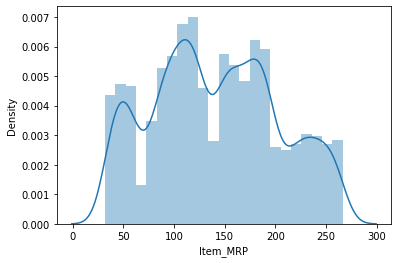

In [76]:
sns.distplot(df_test['Item_MRP'])

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

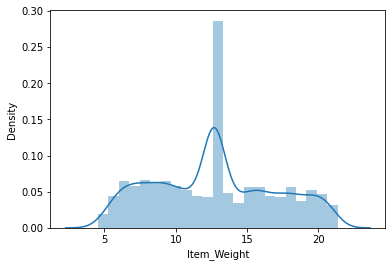

In [77]:
sns.distplot(df_test['Item_Weight'])

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

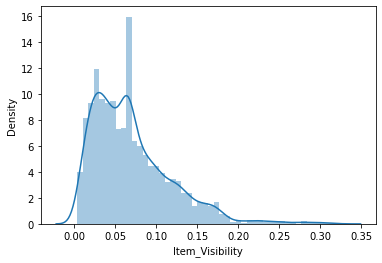

In [78]:
sns.distplot(df_test['Item_Visibility'])

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

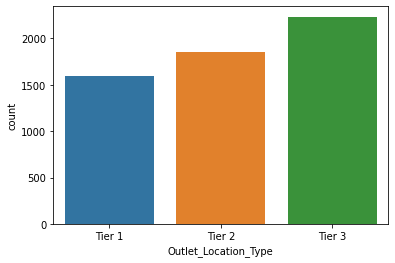

In [79]:
sns.countplot(df_test['Outlet_Location_Type'])

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Age', ylabel='count'>

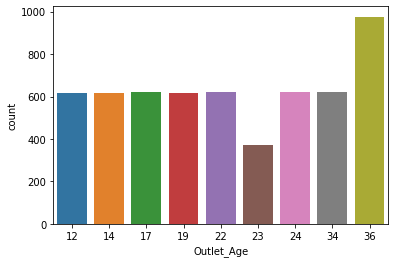

In [80]:
sns.countplot(df_test['Outlet_Age'])

In [81]:
klib.corr_mat(df_test)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Age
Item_Weight,1.00,-0.01,0.05,0.01,-0.01
Item_Visibility,-0.01,1.00,-0.01,-0.10,0.10
Item_MRP,0.05,-0.01,1.00,-0.01,0.01
Outlet_Establishment_Year,0.01,-0.10,-0.01,1.00,-1.00
Outlet_Age,-0.01,0.10,0.01,-1.00,1.00


<AxesSubplot:>

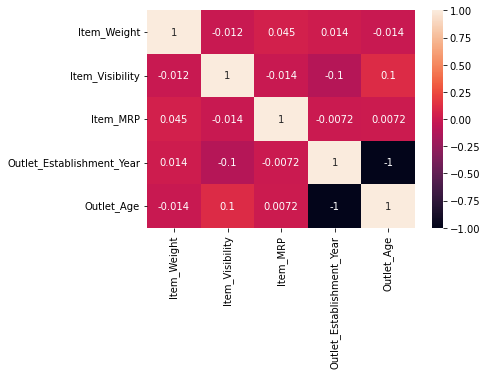

In [82]:
corr = df_test.corr()
sns.heatmap(corr, annot=True)

In [83]:
# Encoding

#df_test = pd.get_dummies(df_test, columns = ['Item_Fat_Content', 'Item_Type','Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'])

In [84]:
new_le = LabelEncoder()

df_test['Item_Fat_Content'] = new_le.fit_transform(df_test['Item_Fat_Content'])
df_test['Item_Type'] = new_le.fit_transform(df_test['Item_Type'])
df_test['Outlet_Size'] = new_le.fit_transform(df_test['Outlet_Size'])
df_test['Outlet_Location_Type'] = new_le.fit_transform(df_test['Outlet_Location_Type'])
df_test['Outlet_Type'] = new_le.fit_transform(df_test['Outlet_Type'])

In [85]:
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Age,Item_Category
0,FDW58,20.750000,0,0.007565,0,107.8622,OUT049,1999,1,0,1,22,FD
1,FDW14,8.300000,1,0.038428,0,87.3198,OUT017,2007,2,1,1,14,FD
2,NCN55,14.600000,0,0.099575,1,241.7538,OUT010,1998,2,2,0,23,NC
3,FDQ58,7.315000,0,0.015388,0,155.0340,OUT017,2007,2,1,1,14,FD
4,FDY38,12.695633,1,0.118599,0,234.2300,OUT027,1985,1,2,3,36,FD


# Split the data

In [86]:
X = df.drop(columns=['Outlet_Establishment_Year', 'Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales', 'Item_Category', 'Outlet_Age'])
y = df['Item_Outlet_Sales']

In [87]:
X_test = df_test.drop(columns=['Outlet_Establishment_Year', 'Item_Identifier', 'Outlet_Identifier', 'Item_Category', 'Outlet_Age'])

In [88]:
# Split the data

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state = 42, test_size = 0.3)

In [89]:
y_train.shape, X_train.shape, X_val.shape, y_val.shape, X_test.shape

((5966,), (5966, 8), (2557, 8), (2557,), (5681, 8))

In [90]:
# Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train_std = sc.fit_transform(X_train)
X_train_std = pd.DataFrame(X_train,columns = X_val.columns)

X_val_std = sc.transform(X_val)
X_val_std = pd.DataFrame(X_val,columns = X_train.columns)

X_test_std = sc.transform(X_test)
X_test_std = pd.DataFrame(X_test,columns =  X_train.columns)

# Models

# Linear Regression

In [91]:
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


lr = linear_model.LinearRegression(normalize = True)
lr.fit(X_train_std, y_train)
lr_pred = lr.predict(X_val_std)

lr_score = r2_score((y_val), (lr_pred))
lr_mae = mean_absolute_error((y_val), (lr_pred))
lr_mse = mean_squared_error((y_val), (lr_pred))
lr_rmse = np.sqrt(lr_mse)

lr_score, lr_mae, lr_mse, lr_rmse

(0.5058250622820923, 876.5506377145333, 1384180.8019320988, 1176.5121342052103)

# XGB Regressor

In [92]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(learning_rate = 0.1, n_estimators = 34, random_state = 0)
                 
xgb_model.fit(X_train_std, y_train)
xgb_pred = xgb_model.predict(X_val_std)

xgb_score = r2_score((y_val), (xgb_pred))
xgb_mae = mean_absolute_error((y_val), (xgb_pred))
xgb_mse = mean_squared_error((y_val), (xgb_pred))
xgb_rmse = np.sqrt(xgb_mse)

xgb_score, xgb_mae, xgb_mse, xgb_rmse

(0.5949237409952608, 737.9952380600482, 1134615.979560058, 1065.1835426629807)

In [93]:
(xgb_pred[:5]), (y_val[:5])

(array([1096.3214,  692.737 ,  673.7631, 4784.0356, 2986.0422],
       dtype=float32),
 7503    1743.0644
 2957     356.8688
 7031     377.5086
 1084    5778.4782
 856     2356.9320
 Name: Item_Outlet_Sales, dtype: float64)

In [94]:
X_train_std.shape

(5966, 8)

# Ann

In [95]:
# import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(128, input_shape=(8,), activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(8, activation='linear'),
    keras.layers.Dense(4, activation='linear'),
    keras.layers.Dense(1, activation='linear')
])

model.compile(optimizer='adam',
              loss='mae',
              metrics=['mse'])

history = model.fit(X_train_std, y_train, validation_data = (X_val_std, y_val), epochs = 300)

Epoch 1/300
187/187 [==============================] - 1s 2ms/step - loss: 1253.4443 - mse: 3104166.2500 - val_loss: 1008.2435 - val_mse: 1877398.6250
Epoch 2/300
187/187 [==============================] - 0s 1ms/step - loss: 1036.9597 - mse: 2010566.6250 - val_loss: 1005.1033 - val_mse: 1858344.0000
Epoch 3/300
187/187 [==============================] - 0s 1ms/step - loss: 1031.0226 - mse: 1989686.3750 - val_loss: 994.9109 - val_mse: 1832681.2500
Epoch 4/300
187/187 [==============================] - 0s 1ms/step - loss: 1022.2250 - mse: 1942691.3750 - val_loss: 988.5656 - val_mse: 1797982.3750
Epoch 5/300
187/187 [==============================] - 0s 1ms/step - loss: 1011.7718 - mse: 1906731.1250 - val_loss: 974.4523 - val_mse: 1754087.6250
Epoch 6/300
187/187 [==============================] - 0s 1ms/step - loss: 998.0361 - mse: 1850735.2500 - val_loss: 957.9064 - val_mse: 1677432.1250
Epoch 7/300
187/187 [==============================] - 0s 1ms/step - loss: 982.2828 - mse: 1794645.

187/187 [==============================] - 0s 1ms/step - loss: 768.1224 - mse: 1215306.5000 - val_loss: 736.1110 - val_mse: 1131486.2500
Epoch 56/300
187/187 [==============================] - 0s 1ms/step - loss: 774.0524 - mse: 1230217.0000 - val_loss: 736.1463 - val_mse: 1144151.1250
Epoch 57/300
187/187 [==============================] - 0s 1ms/step - loss: 773.8223 - mse: 1230248.8750 - val_loss: 739.6550 - val_mse: 1130040.6250
Epoch 58/300
187/187 [==============================] - 0s 1ms/step - loss: 768.4871 - mse: 1214180.2500 - val_loss: 732.8806 - val_mse: 1116112.0000
Epoch 59/300
187/187 [==============================] - 0s 1ms/step - loss: 767.4005 - mse: 1210515.3750 - val_loss: 738.2000 - val_mse: 1118128.2500
Epoch 60/300
187/187 [==============================] - 0s 1ms/step - loss: 768.1359 - mse: 1210447.0000 - val_loss: 732.8997 - val_mse: 1131407.0000
Epoch 61/300
187/187 [==============================] - 0s 1ms/step - loss: 765.2446 - mse: 1211885.7500 - val_lo

187/187 [==============================] - 0s 1ms/step - loss: 762.6512 - mse: 1207100.6250 - val_loss: 749.0745 - val_mse: 1176310.5000
Epoch 110/300
187/187 [==============================] - 0s 1ms/step - loss: 761.7350 - mse: 1198120.3750 - val_loss: 737.1436 - val_mse: 1130840.7500
Epoch 111/300
187/187 [==============================] - 0s 1ms/step - loss: 763.4142 - mse: 1204963.5000 - val_loss: 730.5414 - val_mse: 1120240.0000
Epoch 112/300
187/187 [==============================] - 0s 1ms/step - loss: 759.5233 - mse: 1190385.6250 - val_loss: 730.4556 - val_mse: 1111160.5000
Epoch 113/300
187/187 [==============================] - 0s 1ms/step - loss: 761.9998 - mse: 1203674.6250 - val_loss: 733.9889 - val_mse: 1114255.6250
Epoch 114/300
187/187 [==============================] - 0s 1ms/step - loss: 763.4915 - mse: 1200511.7500 - val_loss: 752.4439 - val_mse: 1173806.0000
Epoch 115/300
187/187 [==============================] - 0s 1ms/step - loss: 763.0892 - mse: 1217425.7500 - 

187/187 [==============================] - 0s 1ms/step - loss: 759.0442 - mse: 1193852.8750 - val_loss: 737.5620 - val_mse: 1127078.7500
Epoch 164/300
187/187 [==============================] - 0s 1ms/step - loss: 757.4935 - mse: 1182053.6250 - val_loss: 727.7485 - val_mse: 1107418.2500
Epoch 165/300
187/187 [==============================] - 0s 1ms/step - loss: 756.7704 - mse: 1187211.0000 - val_loss: 729.6804 - val_mse: 1119550.7500
Epoch 166/300
187/187 [==============================] - 0s 1ms/step - loss: 758.8776 - mse: 1193936.1250 - val_loss: 733.3948 - val_mse: 1124145.6250
Epoch 167/300
187/187 [==============================] - 0s 1ms/step - loss: 757.7193 - mse: 1187909.6250 - val_loss: 731.6335 - val_mse: 1123837.0000
Epoch 168/300
187/187 [==============================] - 0s 1ms/step - loss: 760.0107 - mse: 1192332.3750 - val_loss: 733.5701 - val_mse: 1130734.1250
Epoch 169/300
187/187 [==============================] - 0s 1ms/step - loss: 757.7001 - mse: 1186951.2500 - 

187/187 [==============================] - 0s 1ms/step - loss: 759.1332 - mse: 1191558.6250 - val_loss: 733.3149 - val_mse: 1125584.0000
Epoch 218/300
187/187 [==============================] - 0s 1ms/step - loss: 755.9344 - mse: 1186107.3750 - val_loss: 755.3510 - val_mse: 1229502.8750
Epoch 219/300
187/187 [==============================] - 0s 1ms/step - loss: 759.2365 - mse: 1196646.0000 - val_loss: 735.3260 - val_mse: 1121278.7500
Epoch 220/300
187/187 [==============================] - 0s 1ms/step - loss: 760.9677 - mse: 1196790.8750 - val_loss: 734.4968 - val_mse: 1123276.3750
Epoch 221/300
187/187 [==============================] - 0s 1ms/step - loss: 755.8813 - mse: 1182977.1250 - val_loss: 731.7374 - val_mse: 1111341.8750
Epoch 222/300
187/187 [==============================] - 0s 1ms/step - loss: 757.3376 - mse: 1186424.1250 - val_loss: 731.2303 - val_mse: 1122844.8750
Epoch 223/300
187/187 [==============================] - 0s 1ms/step - loss: 760.1123 - mse: 1198596.1250 - 

187/187 [==============================] - 0s 1ms/step - loss: 755.6469 - mse: 1181113.0000 - val_loss: 748.4070 - val_mse: 1149613.7500
Epoch 272/300
187/187 [==============================] - 0s 1ms/step - loss: 755.8572 - mse: 1183964.8750 - val_loss: 735.3806 - val_mse: 1142805.6250
Epoch 273/300
187/187 [==============================] - 0s 1ms/step - loss: 755.2181 - mse: 1180865.6250 - val_loss: 731.7219 - val_mse: 1116220.7500
Epoch 274/300
187/187 [==============================] - 0s 1ms/step - loss: 755.8383 - mse: 1181281.8750 - val_loss: 730.6664 - val_mse: 1125141.0000
Epoch 275/300
187/187 [==============================] - 0s 1ms/step - loss: 756.8055 - mse: 1186799.8750 - val_loss: 730.6187 - val_mse: 1128548.7500
Epoch 276/300
187/187 [==============================] - 0s 1ms/step - loss: 755.7042 - mse: 1185727.5000 - val_loss: 739.8890 - val_mse: 1134637.2500
Epoch 277/300
187/187 [==============================] - 0s 1ms/step - loss: 759.9167 - mse: 1210842.1250 - 

In [96]:
model.evaluate(X_val_std, y_val)

80/80 [==============================] - 0s 620us/step - loss: 734.8552 - mse: 1125992.8750


[734.855224609375, 1125992.875]

In [97]:
Ann_pred = (model.predict(X_val_std))

In [98]:
Ann_score = r2_score((y_val), Ann_pred)
Ann_mae = mean_absolute_error((y_val), Ann_pred)
Ann_mse = mean_squared_error((y_val), Ann_pred)
Ann_rmse = np.sqrt(Ann_mse)
Ann_score, Ann_mae, Ann_mse, Ann_rmse

(0.5980024255099164, 734.8550730730507, 1125992.6041617198, 1061.127986701755)

In [99]:
Ann_pred[:5], (y_val)[:5]

(array([[1302.238 ],
        [ 672.1125],
        [ 735.9007],
        [4652.8945],
        [3162.918 ]], dtype=float32),
 7503    1743.0644
 2957     356.8688
 7031     377.5086
 1084    5778.4782
 856     2356.9320
 Name: Item_Outlet_Sales, dtype: float64)

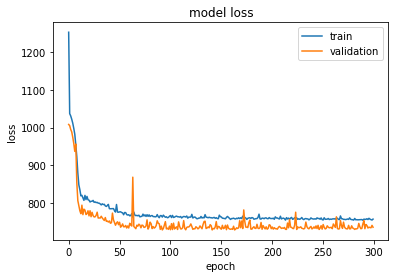

In [100]:
#loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

# ExtraTrees Regression

In [101]:
from sklearn.ensemble import ExtraTreesRegressor

ExtraTrees_reg = ExtraTreesRegressor(n_estimators = 300, random_state = 0)

ExtraTrees_reg.fit(X_train_std, y_train)
ExtraTrees_pred = ExtraTrees_reg.predict(X_val_std)

ExtraTrees_score = r2_score((y_val), (ExtraTrees_pred))
ExtraTrees_mae = mean_absolute_error((y_val), (ExtraTrees_pred))
ExtraTrees_mse = mean_squared_error((y_val), (ExtraTrees_pred))
ExtraTrees_rmse = np.sqrt(ExtraTrees_mse)

ExtraTrees_score, ExtraTrees_mae, ExtraTrees_mse, ExtraTrees_rmse

(0.4999733859961485, 823.6657757645675, 1400571.3093332418, 1183.4573542520413)

# Random Forest Regression

In [102]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state = 0, n_estimators = 200, max_depth = 100)


rf_model.fit(X_train_std, y_train)
rf_pred = rf_model.predict(X_val_std)

rf_score = r2_score((y_val), (rf_pred))
rf_mae = mean_absolute_error((y_val), (rf_pred))
rf_mse = mean_squared_error((y_val), (rf_pred))
rf_rmse = np.sqrt(rf_mse)

rf_score, rf_mae, rf_mse, rf_rmse

(0.5450212242740884, 784.1899821114587, 1274392.6058951076, 1128.8899883935137)

# Gradient Boosting regression

In [116]:
from sklearn.ensemble import GradientBoostingRegressor

gb_reg = GradientBoostingRegressor(learning_rate = 0.1, n_estimators = 37, random_state = 0)

gb_model = gb_reg.fit(X_train_std, y_train)
gb_pred = gb_reg.predict(X_val_std)

gb_score = r2_score(y_val, gb_pred)
gb_mae = mean_absolute_error(y_val, gb_pred)
gb_mse = mean_squared_error(y_val, gb_pred)
gb_rmse = np.sqrt(gb_mse)

gb_score, gb_mae, gb_mse, gb_rmse

(0.6014989841202969, 742.6580967274199, 1116198.766126004, 1056.5030838222879)

In [117]:
y_val[:5], gb_pred[:5]

(7503    1743.0644
 2957     356.8688
 7031     377.5086
 1084    5778.4782
 856     2356.9320
 Name: Item_Outlet_Sales, dtype: float64,
 array([1271.16597076,  781.5953535 ,  781.5953535 , 4797.71216527,
        3121.43715093]))

# Making Predictions on test data


In [105]:
# using the GradientBoostingRegressor for predictions 

gb_reg_test = gb_reg.predict(X_test_std)
gb_reg_test[:5]

array([1663.90107646, 1368.02962074,  687.10646932, 2465.22274231,
       6201.38838404])

In [106]:
df_test_out = df_test[['Item_Identifier', 'Outlet_Identifier']]
df_test_out.head()

,Item_Identifier,Outlet_Identifier
0,FDW58,OUT049
1,FDW14,OUT017
2,NCN55,OUT010
3,FDQ58,OUT017
4,FDY38,OUT027


In [107]:
df_out = df_out = pd.merge(df_test_out,pd.DataFrame(gb_reg_test),how = 'left',left_index = True, right_index = True)

In [108]:
df_out.rename(columns = {0:'Item_Outlet_Sales'}, inplace = True)
df_out.tail()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
5676,FDB58,OUT046,2132.230004
5677,FDD47,OUT018,2605.007791
5678,NCO17,OUT045,1910.472217
5679,FDJ26,OUT017,3402.642672
5680,FDU37,OUT045,1271.165971


In [109]:
# Save the data frame as a csv

import os
os.chdir(r'C:\Users\apega\My py notes\Machine Learning\My ML Projects\Stores Sales Prediction')

df_out.to_csv('final_submission.csv', index = False)

# Save the model

In [110]:
import pickle

In [125]:
pickle.dump(gb_reg, open('models/gb.pkl','wb'))
pickle.dump(sc, open('models/scaler.pkl','wb'))

In [126]:
# load the model

model = pickle.load(open('models/gbm.pkl','rb'))

In [127]:
# Custom Predictions
pred = np.array([[31, 1, 0.032, 1, 30, 0, 0, 0]])
pred

array([[31.   ,  1.   ,  0.032,  1.   , 30.   ,  0.   ,  0.   ,  0.   ]])

In [128]:
model.predict(pred)

array([137.26722759])